In [4]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from pathlib import Path

from src.paths import project_dir
from src.datasets.spheres_dataset import SpheresDataset
from src.preprocessing.main_create_v7_spheres_dataset import interface_type_generator
from src.interface_representation.interface_types import InterfaceType

logging.basicConfig(level=logging.INFO)

In [5]:
base_dir = Path('./../../src/preprocessing')

In [10]:
interface_types = [
        InterfaceType.SIGNED_DISTANCE_EXACT,
        InterfaceType.SIGNED_DISTANCE_APPROXIMATE,
        InterfaceType.HEAVISIDE,
        InterfaceType.TANH_EPSILON,
    ]

epsilons = [1/128, 1/64, 1/32, 1/16]

datasets = []

for interface_type, epsilon, outdir in interface_type_generator(interface_types, epsilons):
    datasets.append(SpheresDataset(base_dir / outdir, split='val', debug=False))

INFO:src.datasets.spheres_dataset:Constructed splits of size (number of runs NOT snapshots): train=2000, val=500
INFO:src.datasets.spheres_dataset:Loaded 500 files for split val
INFO:src.datasets.spheres_dataset:First file: ../../src/preprocessing/data/v7_spheres/SIGNED_DISTANCE_EXACT/spheres_305.npz
INFO:src.datasets.spheres_dataset:Generated 500 samples of ellipse data
INFO:src.datasets.spheres_dataset:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:src.datasets.spheres_dataset:Constructed splits of size (number of runs NOT snapshots): train=2000, val=500
INFO:src.datasets.spheres_dataset:Loaded 500 files for split val
INFO:src.datasets.spheres_dataset:First file: ../../src/preprocessing/data/v7_spheres/SIGNED_DISTANCE_APPROXIMATE/spheres_305.npz
INFO:src.datasets.spheres_dataset:Generated 500 samples of ellipse data
INFO:src.datasets.spheres_dataset:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:src.datasets.spheres_dataset:Constructed splits of size (number of runs N

In [7]:
# First, check that all datasets have same length
lengths = [len(dataset) for dataset in datasets]
assert all(length == lengths[0] for length in lengths)

In [8]:

def visualise_dataset_sample(arr):
    arr = arr.squeeze()

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(arr[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(arr[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(arr[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()


InterfaceType.SIGNED_DISTANCE_EXACT


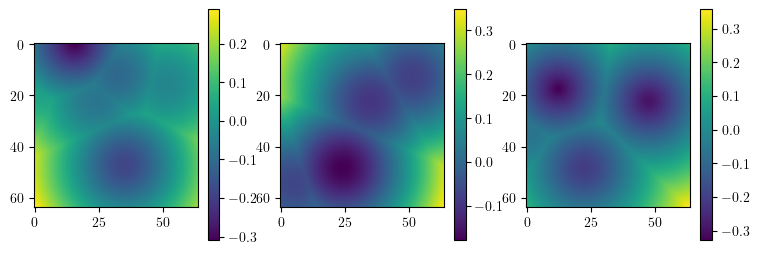

InterfaceType.SIGNED_DISTANCE_APPROXIMATE


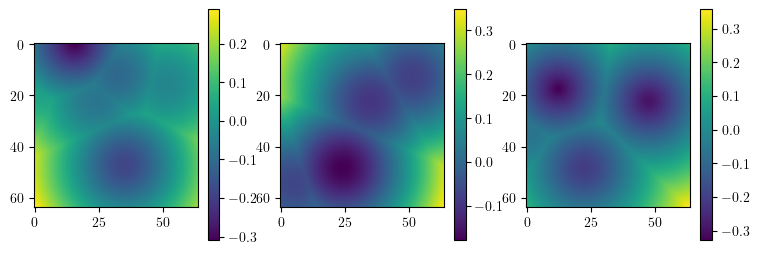

InterfaceType.HEAVISIDE


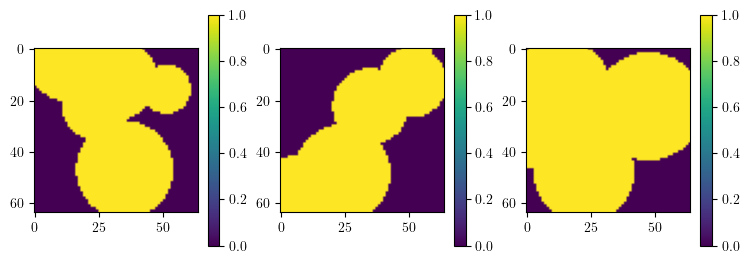

InterfaceType.TANH_EPSILON


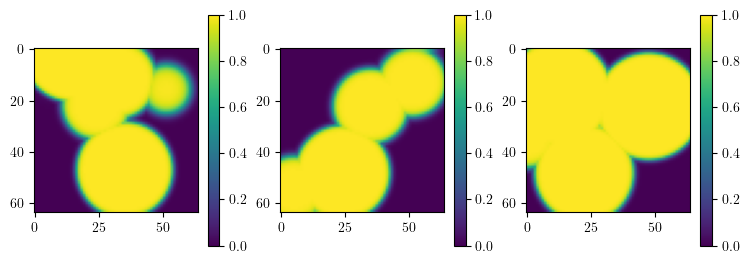

InterfaceType.TANH_EPSILON


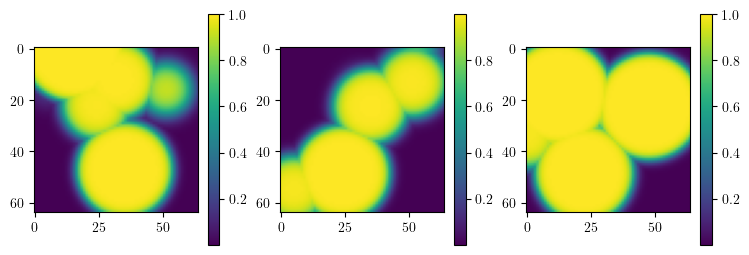

InterfaceType.TANH_EPSILON


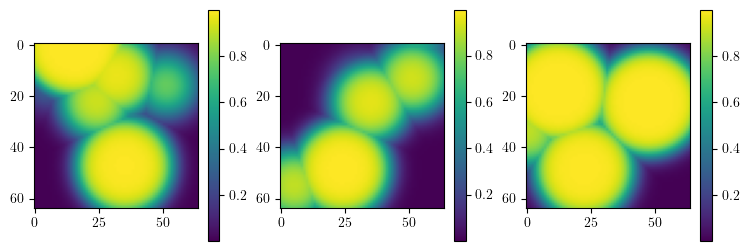

InterfaceType.TANH_EPSILON


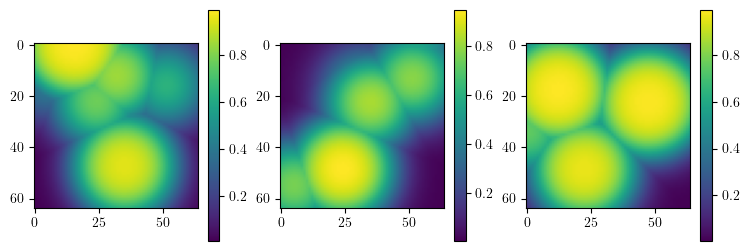

In [9]:
# Visualise first sample from each dataset

for dataset, interface_type in zip(datasets, interface_type_generator(interface_types, epsilons)):
    print(interface_type[0])
    visualise_dataset_sample(dataset[0])


In [14]:
def visualise_grad_magnitude(arr):
    dx = 1 / 64
    arr = arr.squeeze()
    grad = np.gradient(arr, dx)
    grad_magnitude = np.sqrt(np.sum(np.square(grad), axis=0))

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(grad_magnitude[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(grad_magnitude[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(grad_magnitude[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()
    

InterfaceType.SIGNED_DISTANCE_EXACT


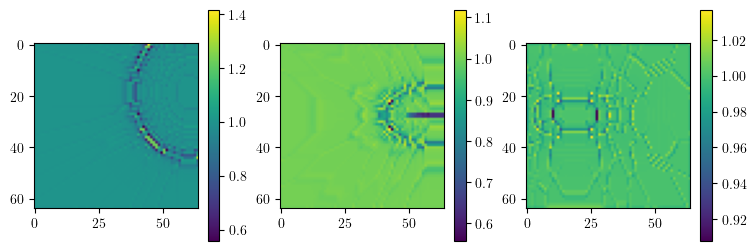

InterfaceType.SIGNED_DISTANCE_APPROXIMATE


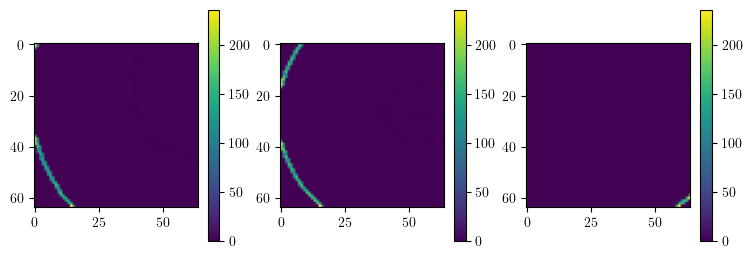

InterfaceType.HEAVISIDE


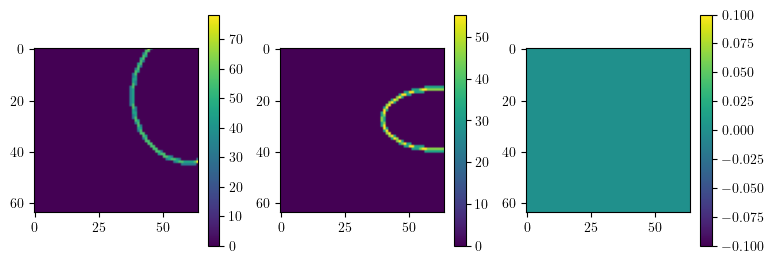

InterfaceType.TANH_EPSILON


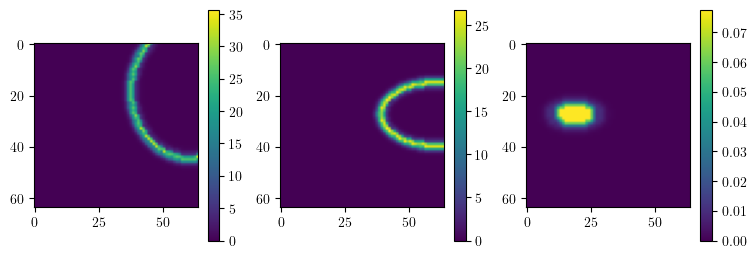

InterfaceType.TANH_EPSILON


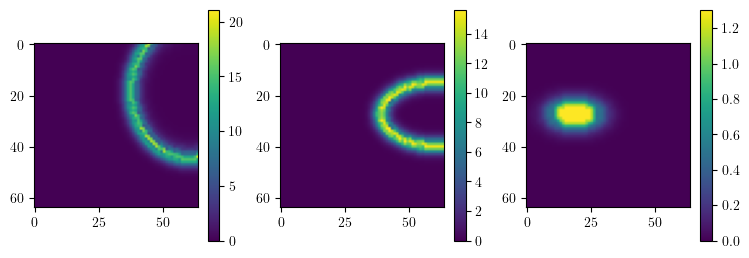

InterfaceType.TANH_EPSILON


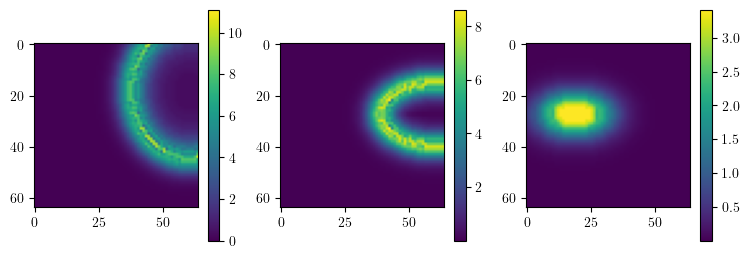

InterfaceType.TANH_EPSILON


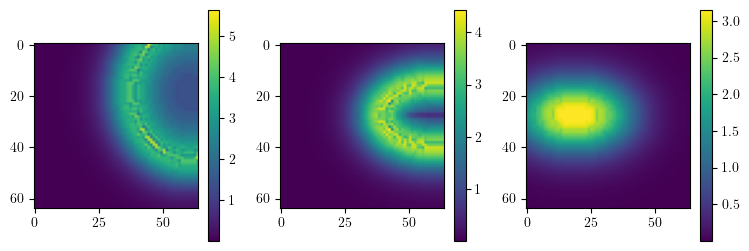

In [15]:
# Visualise gradient magnitude of first sample from each dataset

for dataset, interface_type in zip(datasets, interface_type_generator(interface_types, epsilons)):
    print(interface_type[0])
    visualise_grad_magnitude(dataset[0])


INFO:src.datasets.spheres_dataset:Constructed splits of size (number of runs NOT snapshots): train=2000, val=500
INFO:src.datasets.spheres_dataset:Loaded 500 files for split val
INFO:src.datasets.spheres_dataset:First file: ../../src/preprocessing/data/v7_spheres/HEAVISIDE/spheres_305.npz
INFO:src.datasets.spheres_dataset:Generated 500 samples of ellipse data
INFO:src.datasets.spheres_dataset:Each sample has shape torch.Size([1, 64, 64, 64])


(array([122.,  65.,  46.,  26.,  37.,  25.,  18.,  13.,  29.,  15.,  18.,
         11.,  12.,  12.,   9.,  17.,  12.,   4.,   4.,   5.]),
 array([5.03540039e-04, 4.02841568e-02, 8.00647736e-02, 1.19845390e-01,
        1.59626007e-01, 1.99406624e-01, 2.39187241e-01, 2.78967857e-01,
        3.18748474e-01, 3.58529091e-01, 3.98309708e-01, 4.38090324e-01,
        4.77870941e-01, 5.17651558e-01, 5.57432175e-01, 5.97212791e-01,
        6.36993408e-01, 6.76774025e-01, 7.16554642e-01, 7.56335258e-01,
        7.96115875e-01]),
 <BarContainer object of 20 artists>)

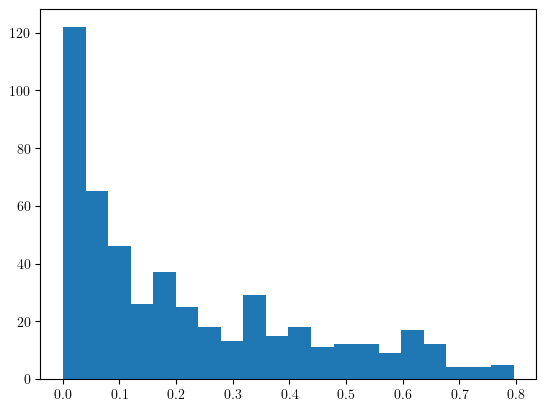

In [17]:
# Get the volume fraction dataset and check the distribution of total occupied volume over samples

it = InterfaceType.HEAVISIDE
dataset = SpheresDataset(base_dir / interface_type_generator([it], [None]).__next__()[2], split='val', debug=False)

vol_fracs = []

for i in range(len(dataset)):
    vol_fracs.append(np.sum(dataset[i].squeeze().numpy()) / dataset[i].numel())
    
plt.hist(vol_fracs, bins=20)